In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


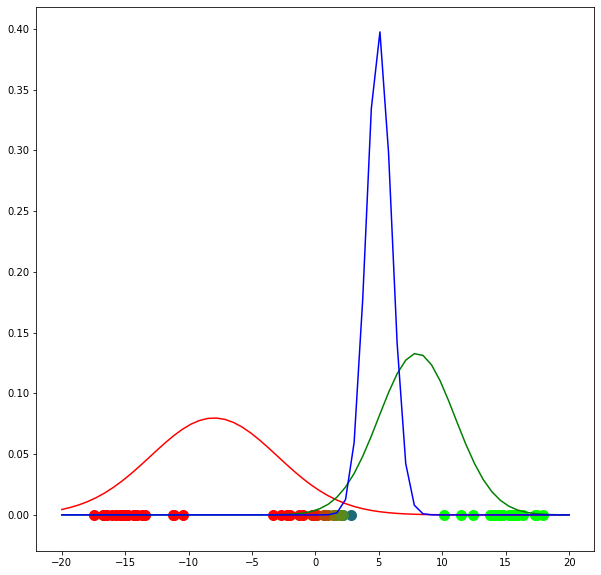

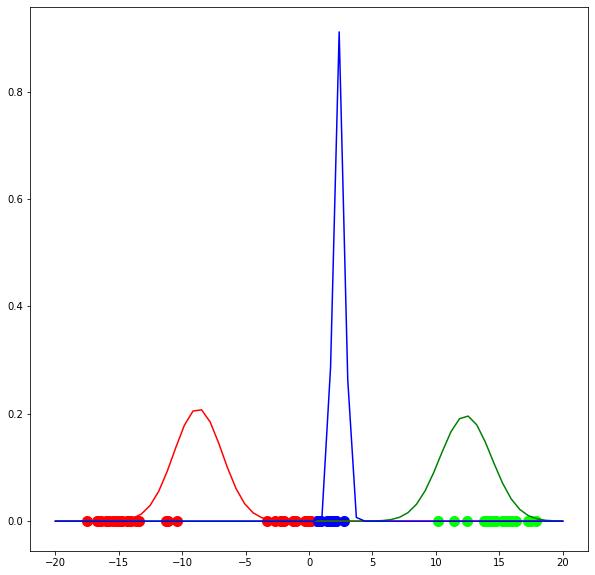

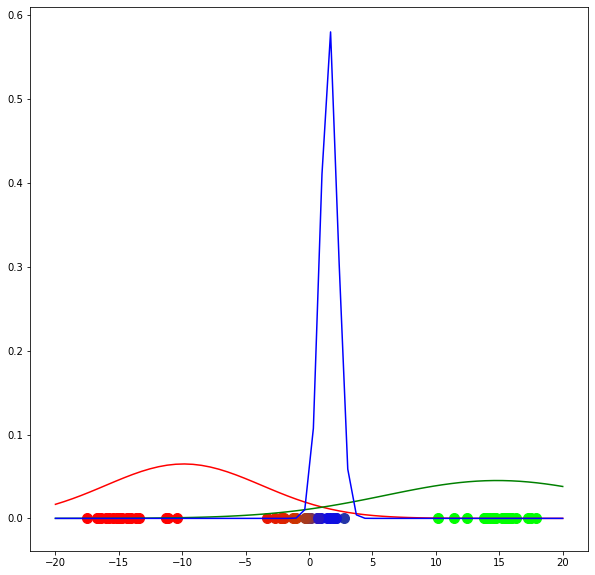

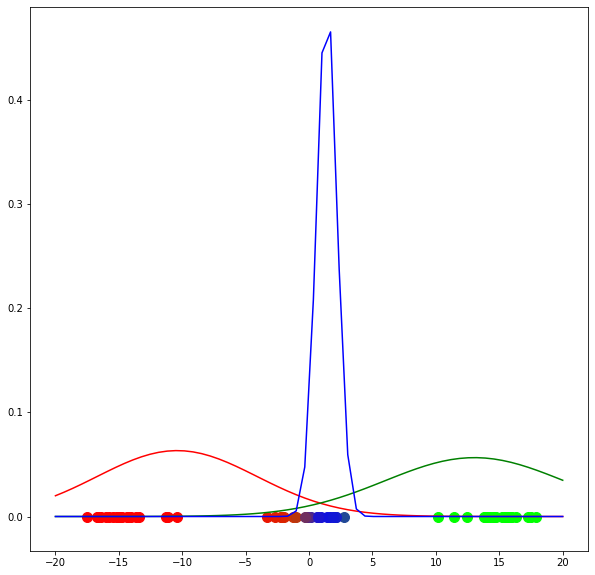

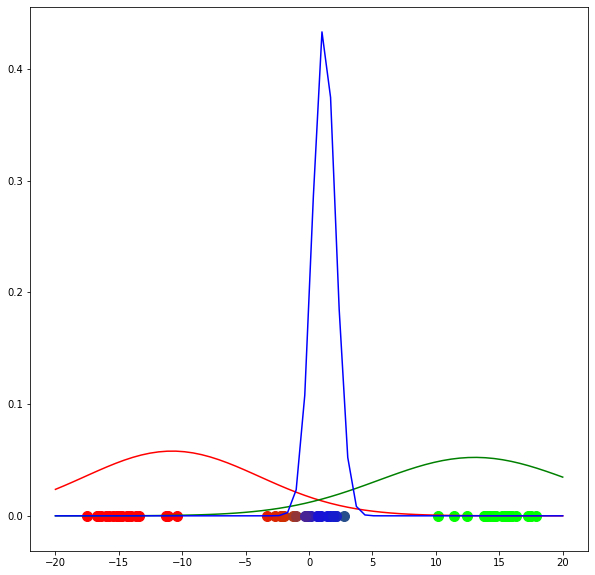

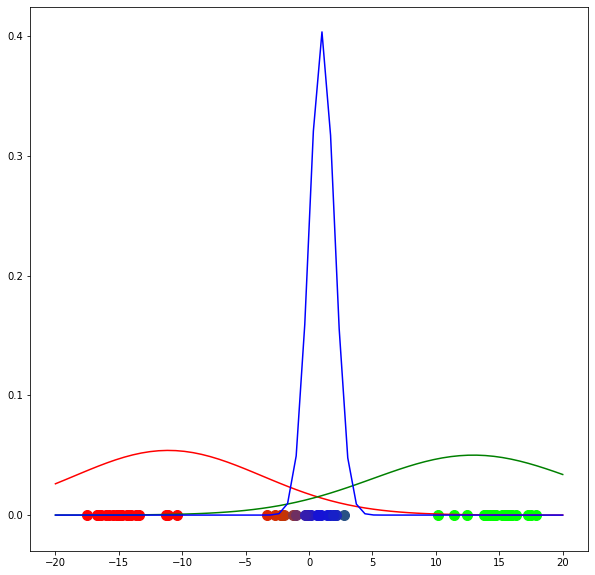

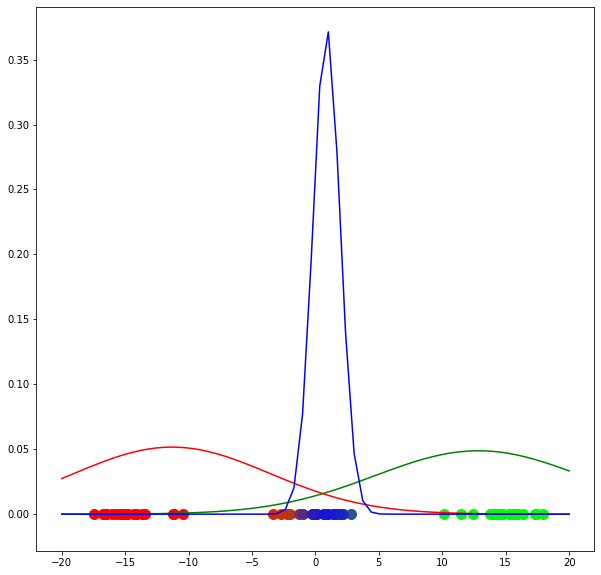

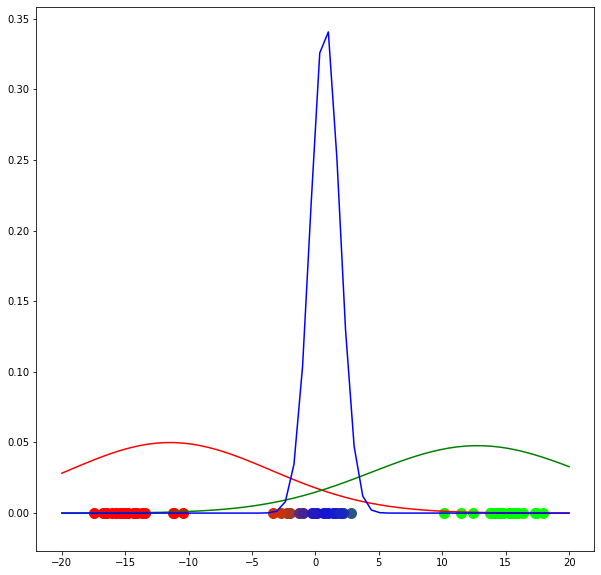

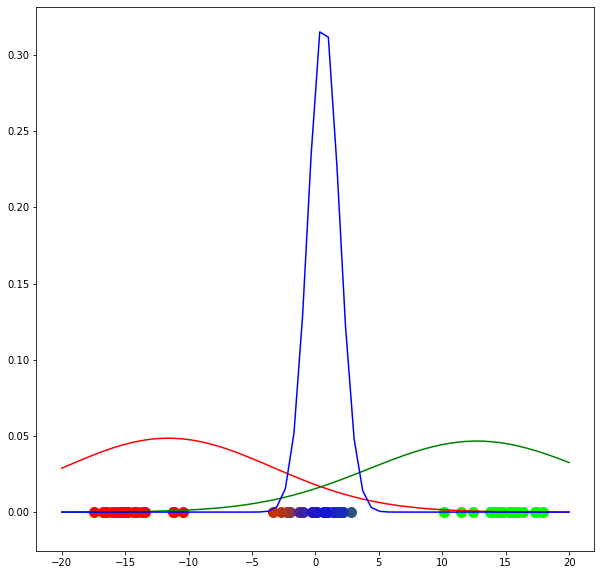

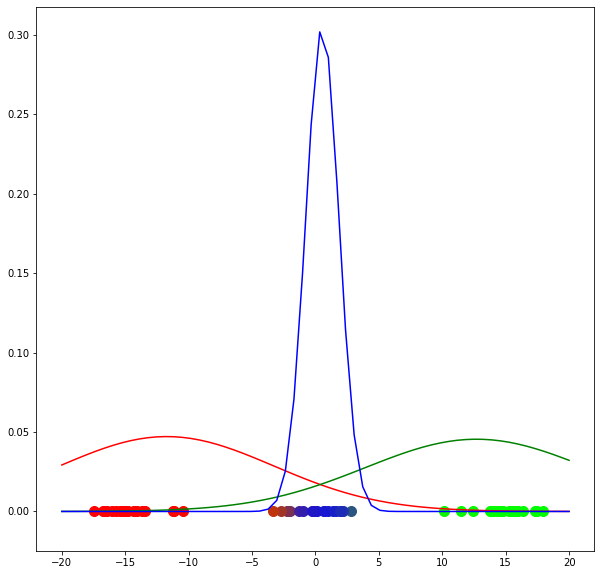

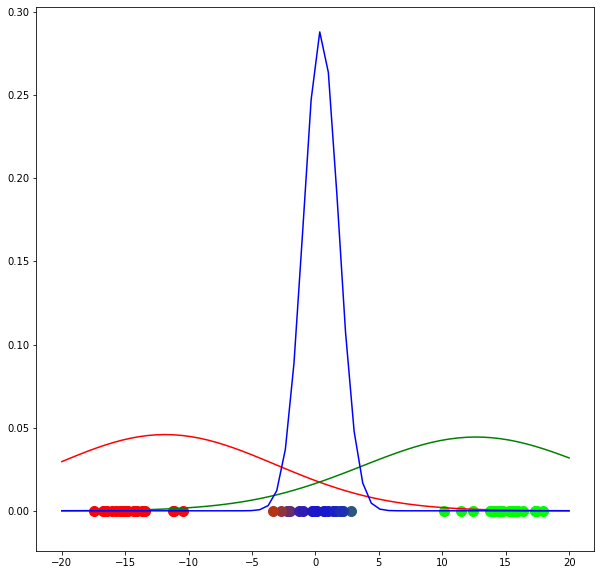

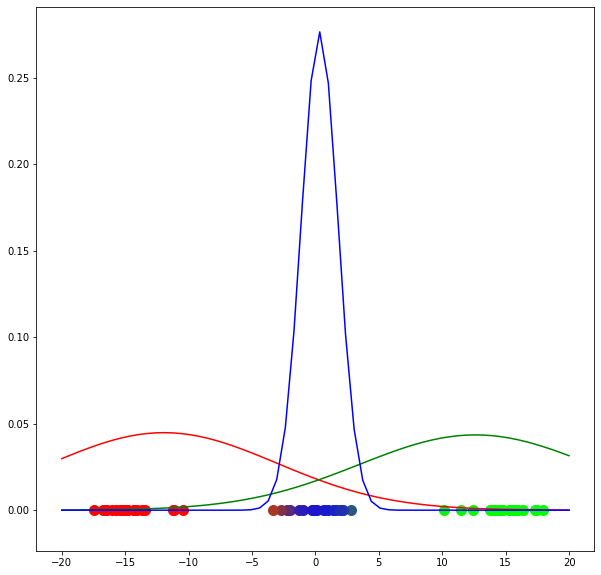

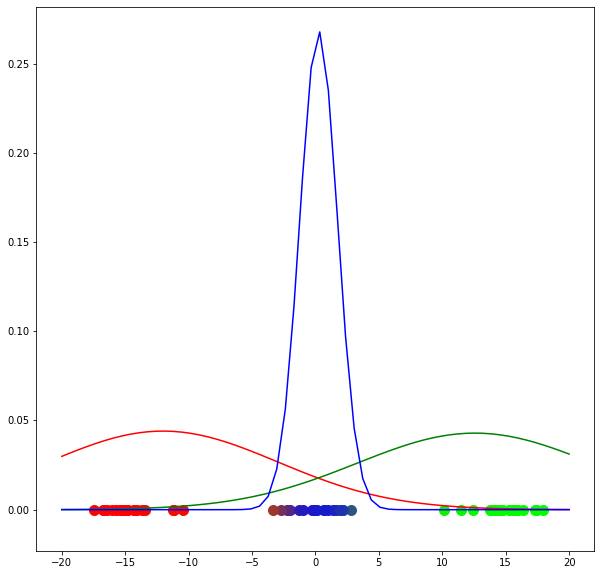

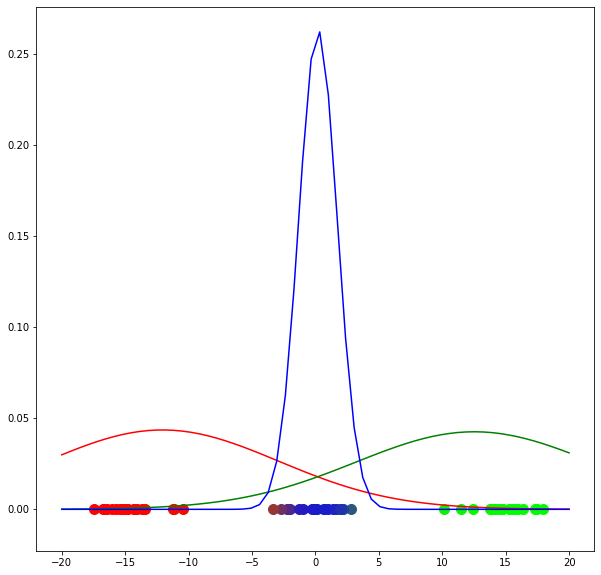

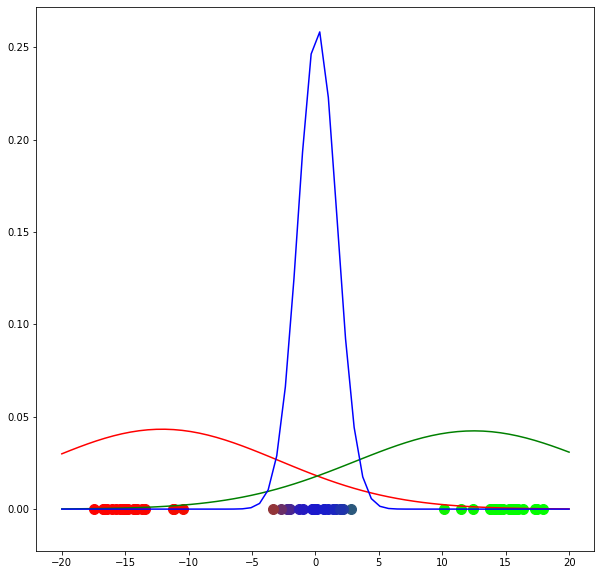

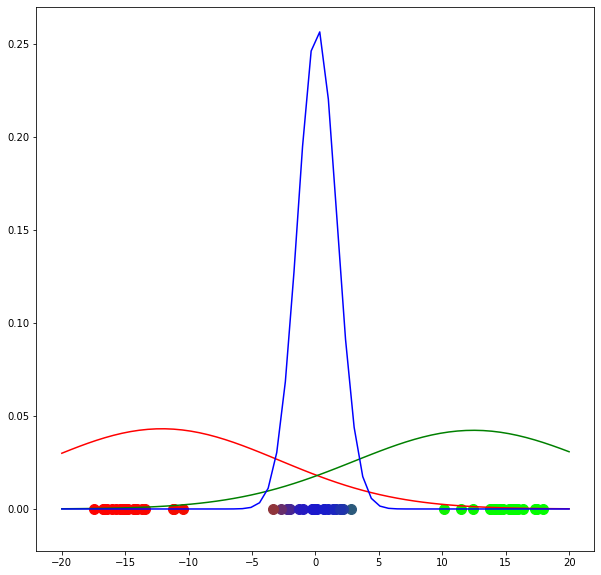

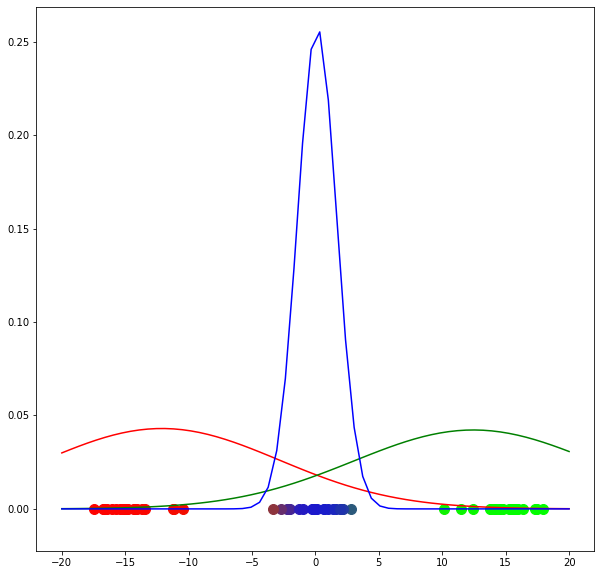

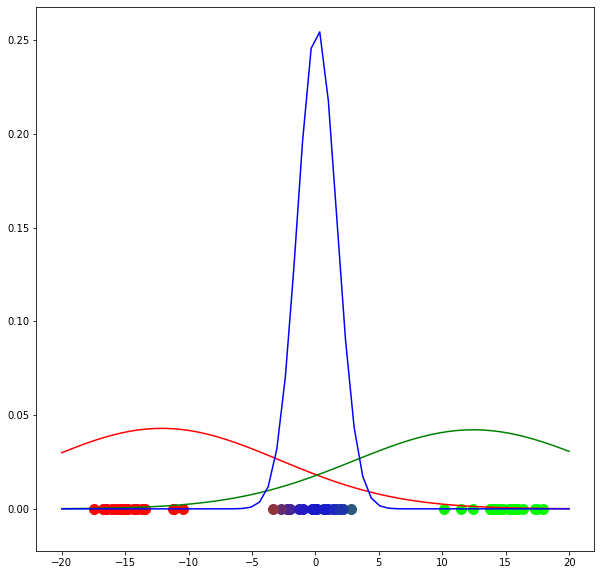

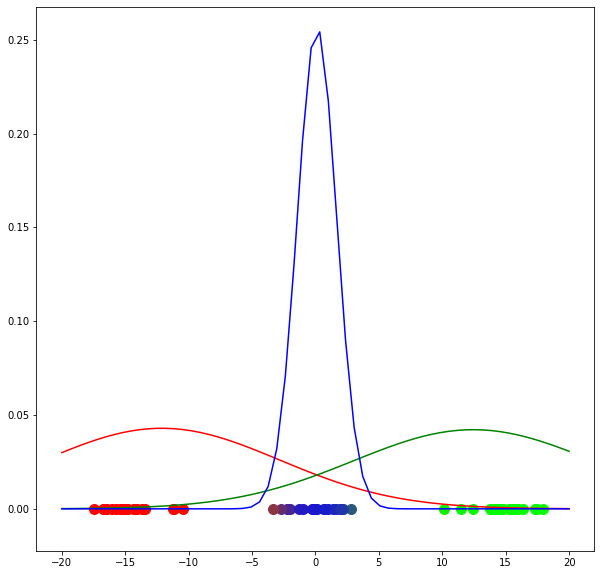

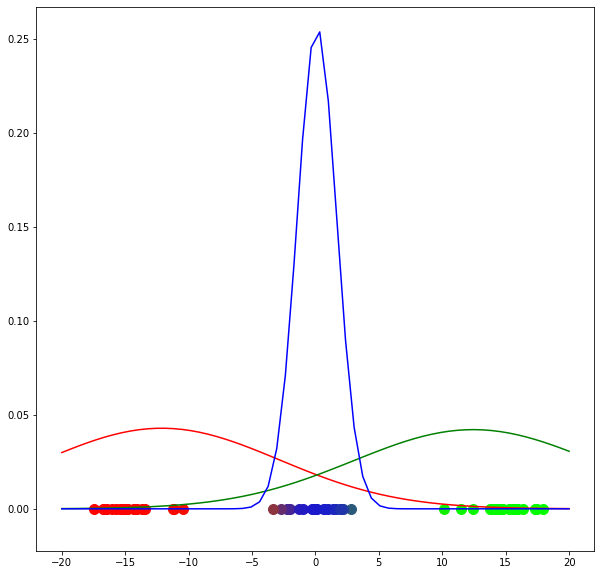

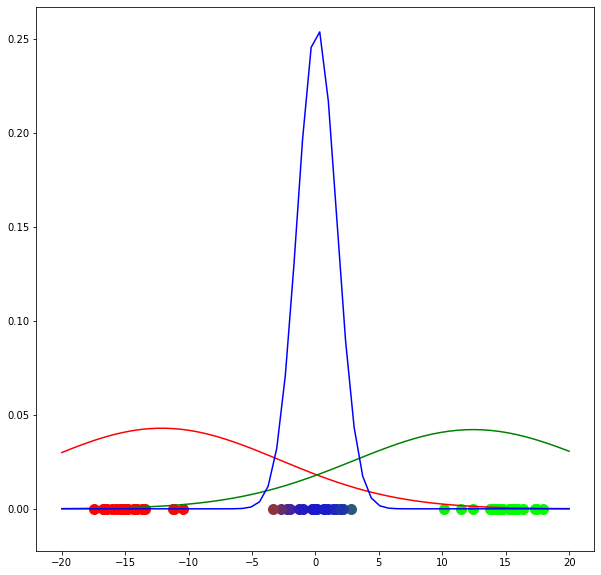

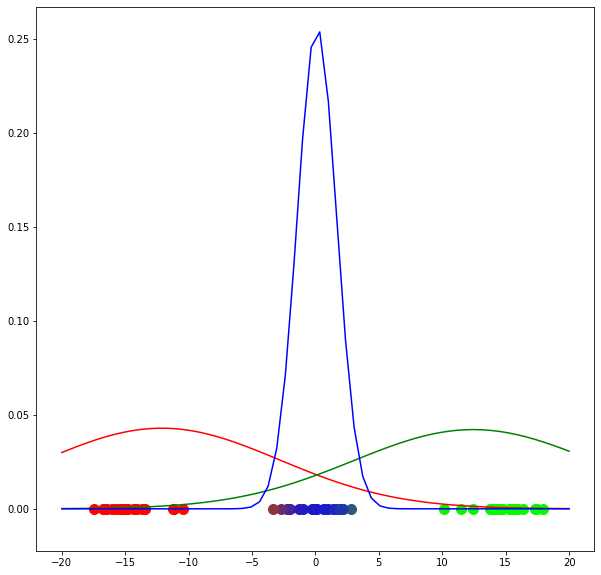

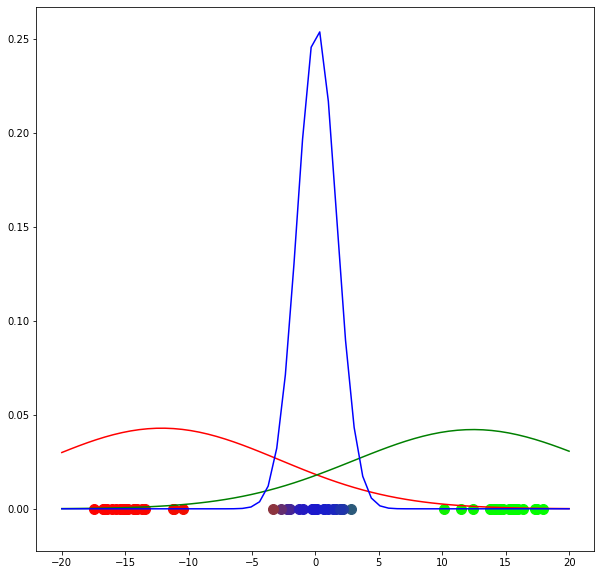

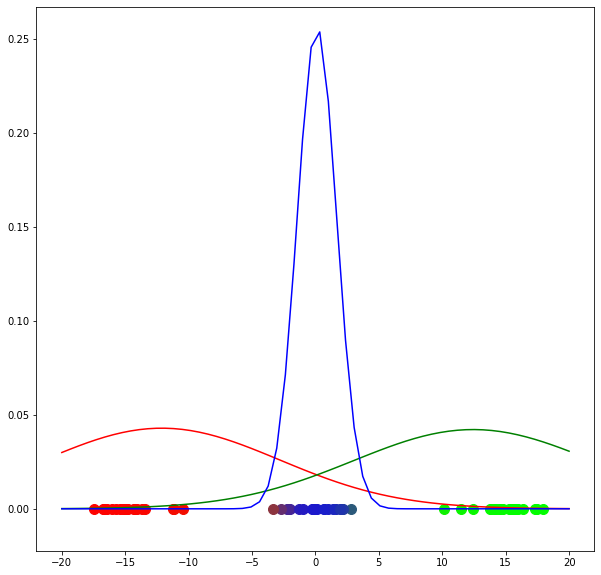

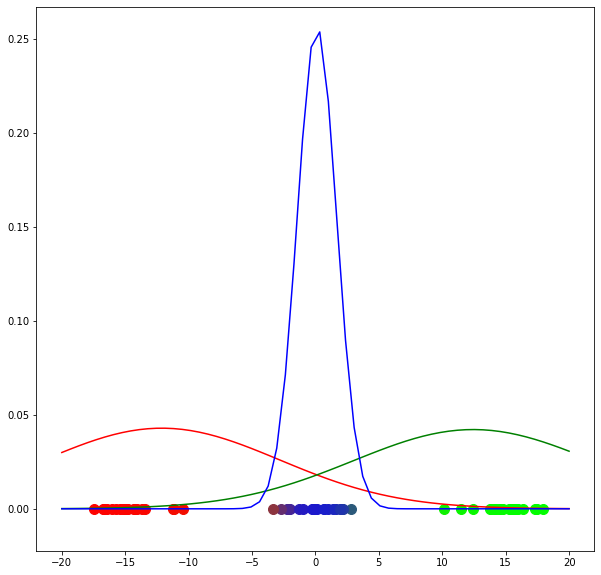

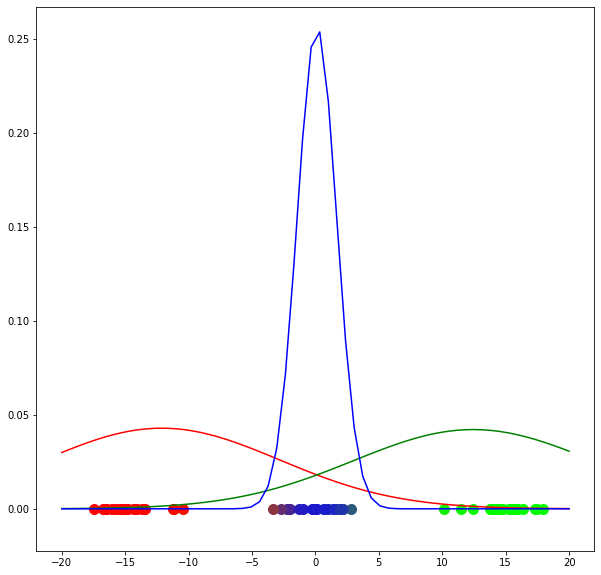

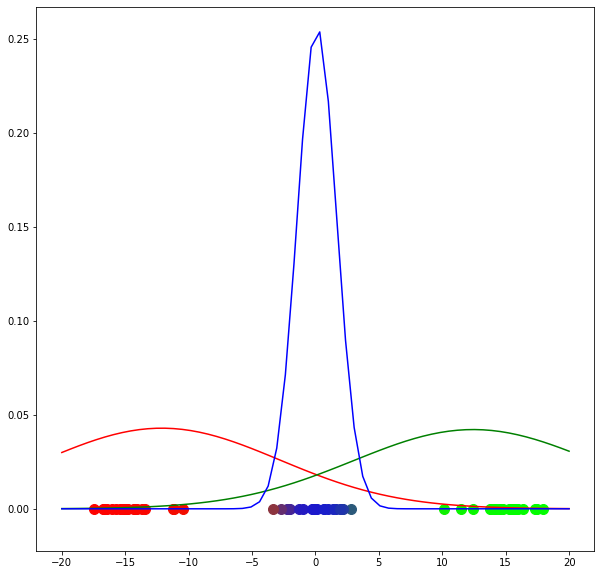

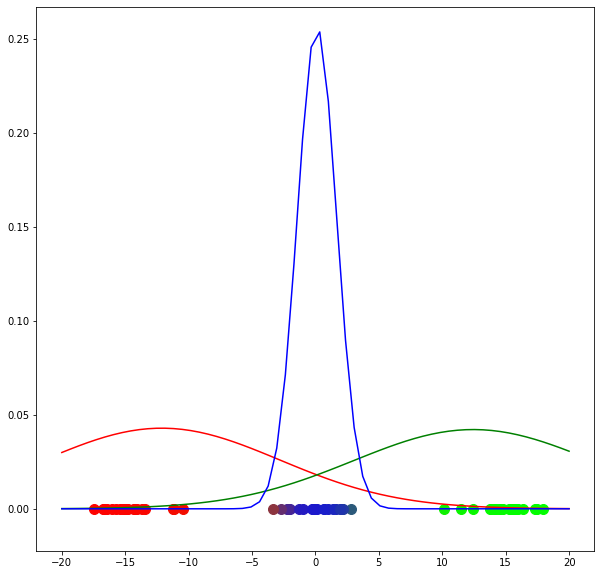

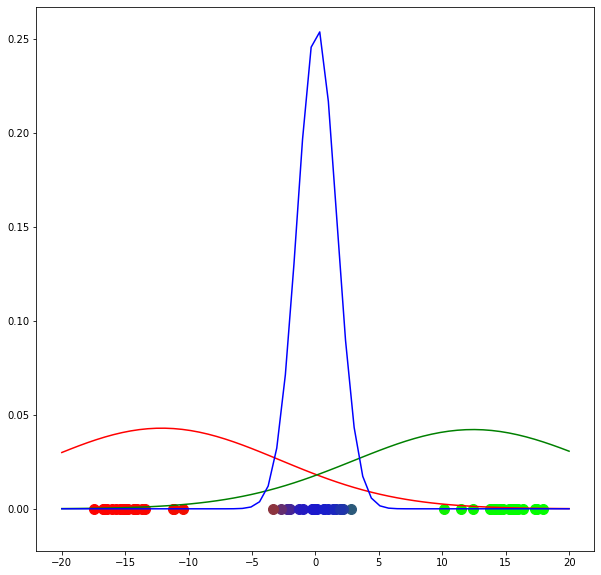

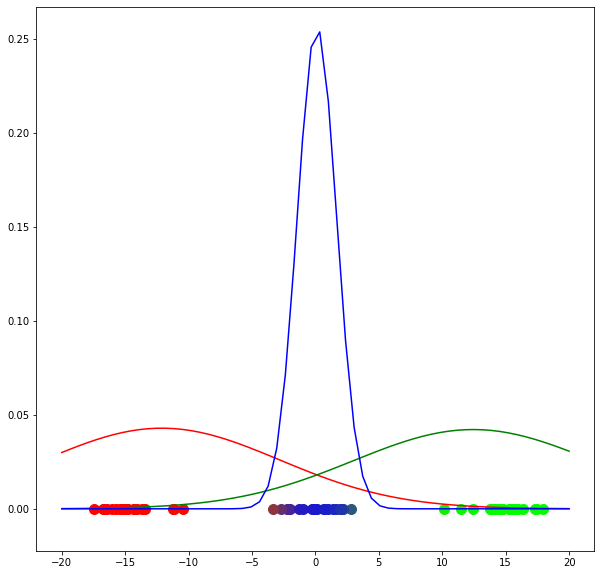

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import random
import pickle
import math
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    # """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(data)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        
        for i in range(len(r)):
        	# Write code here
            x=0
            for j in range(len(r[0])):
                x += r[i,j]
            r[i,:] = r[i,:]/x
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=np.array([[r[i][0],r[i][1],r[i][2]]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60).reshape(-1,1),g.reshape(-1,1),c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
#                 m = np.sum(r[:,c])
                m=0
                for i in range(len(r)):
                    m += r[i,c]
                m_c.append(m)
            """calculate pi_c"""
            # write code here
            sum_mc = 0
            for i in m_c:
                sum_mc += i
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/sum_mc)
            # print(self.pi)
            """calculate mu_c"""
            # write code here
#             self.mu =
            x=self.X.reshape(len(self.X),1)
            for i in range(len(m_c)):
                self.mu[i] = np.sum(x*r,axis=0)[i]/m_c[i]
            """calculate var_c"""
            var_c = []
            a = np.array(r[:,c]).reshape(60,1)
            for c in range(len(r[0])):
                var_c.append(math.sqrt((1/m_c[c])*np.dot((a*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c]))))
            # print(self.var)
            self.var = var_c
            plt.show()
data1 = load("/content/drive/My Drive/Question-2/dataset1.pkl")
data2 = load("/content/drive/My Drive/Question-2/dataset2.pkl")
data3 = load("/content/drive/My Drive/Question-2/dataset3.pkl")
data = data1.flatten()
g = GMM1D(data,30,[-8,8,5],[1/3,1/3,1/3],[5,3,1])
g.run()

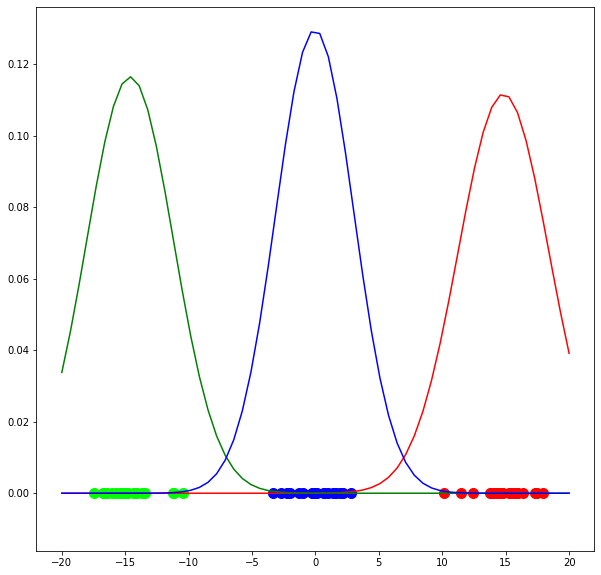

In [10]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
data = np.array(data).reshape(-1,1)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(data)
prediction_gmm = gmm.predict(data)
probs = gmm.predict_proba(data)
centers = np.zeros((3,1))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(data)
    centers[i, :] = data[np.argmax(density)]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(data)):
    ax0.scatter(data[i],0,c=[[probs[i][0],probs[i][1],probs[i][2]]],s=100)
for g,c in zip([norm(loc=gmm.means_[0],scale=gmm.covariances_[0]).pdf(np.linspace(-20,20,num=60)),
                norm(loc=gmm.means_[1],scale=gmm.covariances_[1]).pdf(np.linspace(-20,20,num=60)),
                norm(loc=gmm.means_[2],scale=gmm.covariances_[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
    ax0.plot(np.linspace(-20,20,num=60),g.flatten(),c=c)